In [1]:
import pickle as pk
from utils.utils import graph_plot
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [48]:
file='experimento_trueValues_3T1N_10rep_5pasos.pkl'
with open(file, 'rb') as f:
    exp_dict = pk.load(f)

print(exp_dict[0].keys())

dict_keys(['free_hist', 'reconfig_hist', 'L2reconfig', 'max_c', 'c_config', 'c_L2'])


In [35]:
print(len(exp_dict))

10


In [49]:
free_hist=exp_dict[0]['free_hist']
reconfig_hist=exp_dict[0]['reconfig_hist']
max_c=exp_dict[0]['max_c']
c_config=exp_dict[0]['c_config']    
c_L2=exp_dict[0]['c_L2']

In [14]:
for i in range(len(exp_dict)):
    print(exp_dict[i]['c_config'])

[-21.051073404757588, -20.026208057649704, -20.743655146593397, -20.411205558492135, -20.435104375537662, -20.197140521239373, -20.31856836951635, -20.822877919961943, -20.824798711471512, -20.297625411342157, -19.59856458736732, -19.408285672410127, -18.818233904918714, -19.747026980659218, -20.672744785540836, -21.598901197397502, -20.926899035768574, -20.755159635477582, -20.16947711302101, -20.07181498167624, -21.232021373210895, -20.14112696859469, -20.364567381312764, -20.140146800254303, -19.646551454122736, -19.972395114696532, -19.28484673683719, -19.47337995326221, -19.18964948513068, -18.873683838107777, -18.793507152959194, -18.785477250518632, -18.728581808140227, -18.54836583635159, -18.648829723530028, -17.615682005679886, -17.396516871910524, -17.83801114220995, -17.469499060296048, -17.776390816239918, -17.774204983836754, -17.787980909872083, -17.44643597928316, -17.775347944918096, -18.453548475818888, -18.64416977581362, -18.49301563225897, -18.74070363306766, -19.0

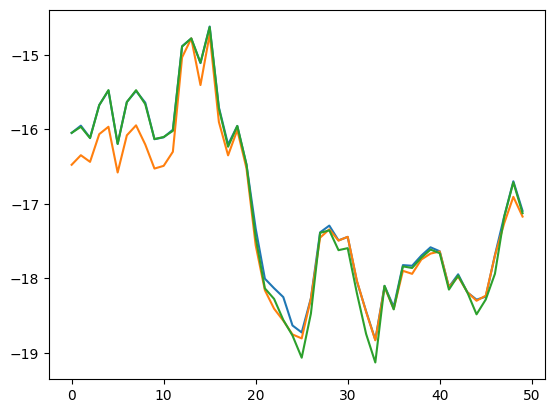

In [50]:
plt.plot(max_c,label='max_c')
plt.plot(c_config, label='c_config')
plt.plot(c_L2, label='c_L2')

In [51]:
from cProfile import label
from matplotlib import legend


matr_diff_E=np.empty((len(exp_dict),len(exp_dict[0]['max_c'])))
matr_diff_L2=np.empty((len(exp_dict),len(exp_dict[0]['max_c'])))
for exp in range(len(exp_dict)):
    max_c=np.array(exp_dict[exp]['max_c'])
    c_config=np.array(exp_dict[exp]['c_config'])
    c_L2=np.array(exp_dict[exp]['c_L2'])
    matr_diff_E[exp,:]=(-(max_c-c_config)/max_c)*100
    matr_diff_L2[exp,:]=(-(max_c-c_L2)/max_c)*100
        
#plt.plot(max_c,label='max_c')
#plt.plot(c_config, label='c_config')
     

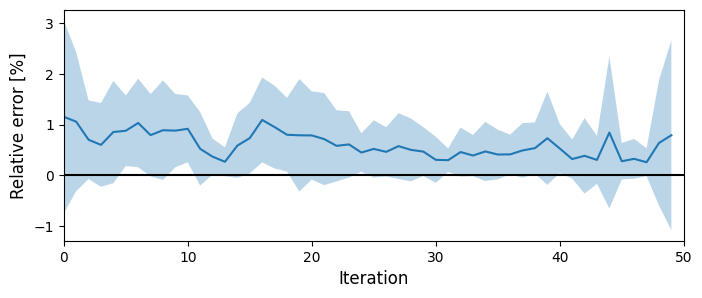

In [64]:
from calendar import c


mediasE = np.mean(matr_diff_E, axis=0)
stdE = np.std(matr_diff_E, axis=0)

mediasL2 = np.mean(matr_diff_L2, axis=0)
stdL2 = np.std(matr_diff_L2, axis=0)
fig3, ax3 = plt.subplots(1,1,figsize=(8,3)) 
ax3.plot(mediasE, label='EGNN')
ax3.fill_between(range(len(mediasE)), mediasE-stdE, mediasE+stdE, alpha=0.3)
#ax3.plot(mediasL2, label='Max L2')
#ax3.fill_between(range(len(mediasL2)), mediasL2-stdL2, mediasL2+stdL2, alpha=0.3)
#for i in range(matr_diff.shape[0]):
#    plt.plot(matr_diff[i,:])
ax3.hlines(0,0,len(mediasE),colors='k')
#plt.legend( fontsize=12)
plt.ylabel('Relative error [%]', fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.xlim(0,len(mediasE))
plt.savefig(f"10runs_dynamics_5step.pdf", format='pdf', bbox_inches='tight', dpi=300)
